# 2D 绘图

## 公共操作

在执行代码前, 需要先执行该代码块

In [45]:
try:
    import sys
    # 将项目根路径加入系统路径集合, 即可以引入相关的包
    sys.path.append("../..")
finally:
    pass

# 引入所需的包
from common.vector_draw import Color, Points, Segment, Polygon, Vector2D, Number, draw
from typing import Tuple
from math import sqrt


## 1. 向量绘制

### 1.1. 绘制向量

向量是一组数的集合, 集合中的每个数表示坐标系上的一个值. 对于二维向量, 是由 `(x, y)` 两个数组成, 分别表示在二维坐标系上 `x` 轴和 `y` 轴两个坐标值

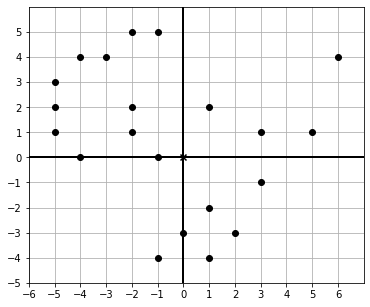

In [46]:
# 定义一个 2D 向量的集合, 由一组二维向量组成
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

# 在坐标轴上绘制向量集合, 即二维坐标系上的一组点
draw(
    Points(*dino_vectors),
)


在向量绘制的基础上, 将其中的两个点用线段连接

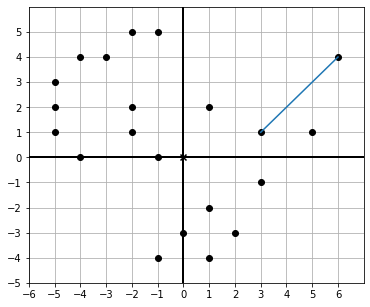

In [47]:
# 在坐标轴上绘制向量集合, 并绘制一条线段连接向量中的两个点
draw(
    Points(*dino_vectors),
    Segment((6, 4), (3, 1)),
)


在向量绘制的基础上, 绘制一组线段, 将向量中的每个点两两进行连接

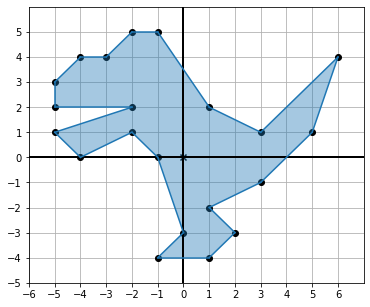

In [48]:
# 在坐标轴上绘制向量集合, 并绘制一组线段组成的多边形
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors, fill=Color.blue),
)


绘制公式 $y=x^2$ 时, 每个 `(x, y)` 坐标的图

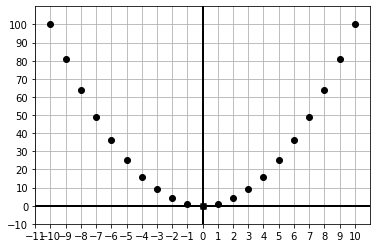

In [49]:
# 产生 y = x ^ 2 的点集
vs = [(x, x**2) for x in range(-10, 11)]

# 绘制点集
draw(
    Points(*vs),
    grid=(1, 10),
    nice_aspect_ratio=False,
)


### 1.2. 向量计算

#### 1.2.1. 向量偏移

向量加法用于对向量进行偏移

移动一个点, 即给点坐标的 `x` 和 `y` 两个分量增加偏移量

In [50]:
def point_add(v: Vector2D, offset: Tuple[Number, Number]) -> Vector2D:
    """
    移动一个点

    Args:
        v (Vector2D): 需要移动的点
        offset (Tuple[Number]): 要移动的偏移量

    Returns:
        Point: 移动后的点
    """
    return (v[0] + offset[0], v[1] + offset[1])


移动一个向量, 即将向量中的所有点进行移动

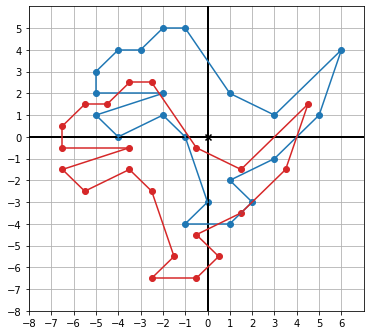

In [51]:
# 将向量进行移动, 即将向量中的每个点进行偏移
dino_vectors2 = [point_add(v, (-1.5, -2.5)) for v in dino_vectors]

# 绘制偏移前的向量和偏移后的向量
draw(
    Points(*dino_vectors, color=Color.blue),
    Polygon(*dino_vectors, color=Color.blue),
    Points(*dino_vectors2, color=Color.red),
    Polygon(*dino_vectors2, color=Color.red),
)


将偏移前后的两个向量对应点进行连接, 即可绘制向量偏移的位移

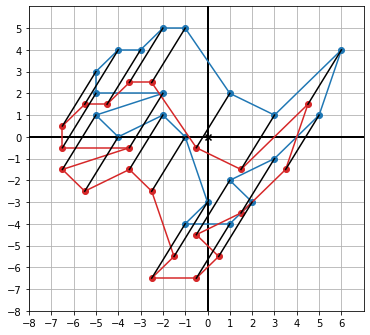

In [52]:
# 计算两个向量偏移的位移
arrows = [
    Segment(tip, tail, color=Color.black)  # 以获取的点组成线段对象集合
    for tip, tail in zip(dino_vectors2, dino_vectors)  # 获取两个向量对应的点
]

# 用线段将偏移前后的两个向量的对应点进行连接
draw(
    Points(*dino_vectors, color=Color.blue),
    Polygon(*dino_vectors, color=Color.blue),
    Points(*dino_vectors2, color=Color.red),
    Polygon(*dino_vectors2, color=Color.red),
    *arrows,
)


#### 1.2.2. 向量长度

向量的长度即从坐标原点到向量点的距离

一个向量可以进行分解, 分解出的两个向量和原始向量可以组成一个直角三角形, 例如向量 `(4, 3)` 可以分解为 `(4, 0)` 和 `(0, 3)` 两个向量

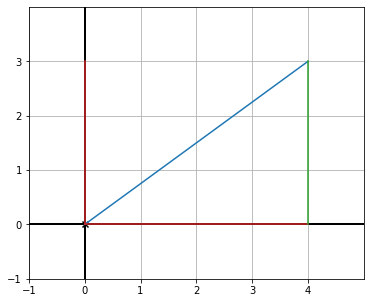

In [53]:
draw(
    Segment([0, 0], [4, 3], color=Color.blue),
    Segment([0, 0], [4, 0], color=Color.red),
    Segment([0, 0], [0, 3], color=Color.red),
    Segment([4, 0], [4, 3], color=Color.green),
)


通过勾股定理, 即可求出一个二维向量的长度

In [54]:
def length(v: Vector2D) -> Number:
    """
    计算一个二维向量的长度

    Args:
        v (Vector2D): 一个向量

    Returns:
        Number: 向量长度
    """
    return sqrt(v[0]**2 + v[1]**2)


In [55]:
vec = (4, 3)

# 计算向量的长度
length(vec)


5.0

#### 1.2.3. 向量和标量

向量可以和一个标量 (scalar) 进行计算. 标量即一个普通数字, 不具备长度和方向.

向量和标量相乘的结果是对向量的**缩放**

In [56]:
def multiple(v: Vector2D, scalar: Number) -> Vector2D:
    """
    二维向量和标量相乘

    Args:
        v (Vector2D): 二维向量

    Returns:
        Vector2D: 缩放后的向量
    """
    return v[0] * scalar, v[1] * scalar


计算一个向量放大后的值

In [57]:
v = (1.2, -3.1)
scalar = 6.5

# 计算向量 v 和标量 scalar 相乘的结果
r = multiple(v, scalar)

r


(7.8, -20.150000000000002)

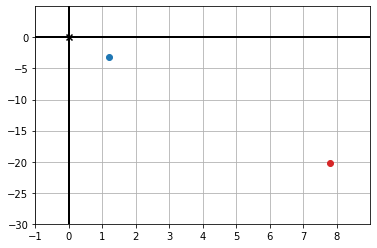

In [58]:
# 绘制原始向量和放大后的向量
draw(
    Points(v, color=Color.blue),  # 绘制原始向量, 蓝色
    Points(r, color=Color.red),  # 绘制放大后的向量, 红色
    grid=(1, 5),
    nice_aspect_ratio=False,
)
